In [2]:
# Import required dependencies
import boto3
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from datetime import datetime
from io import StringIO
import os

In [3]:
s3_client = boto3.client('s3')

bucket_name = 'finance-factoring-ml-dev'

# Import Product 1
df_product1 = pd.read_csv('s3://{}/input/Dataset_Producto_1.csv'.format(bucket_name), sep=',', encoding='latin-1')
df_product1.head()

,Fecha,RFC,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,DiasFaltantes,ImporteFactura,DepositoInicial,Dias,Intereses,InteresesMoratorios,DiasVencido,TotalaPagar,FechaPago,Status
0,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.\t\t,MSJ190101938,MINERASANJULIANSADECV,776,ACF2022006-7,USD\t\t,\n\n2022-07-01\n\n01/07/2022,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"64,180.48","57,762.43",9,287.21,0,\n ...,"58,049.64",2022-06-23\n\n23/06/2022,Liquidado
1,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.\t\t,MSJ190101938,MINERASANJULIANSADECV,775,ACF2022006-7,USD\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"68,764.80","61,888.32",9,307.72,0,\n ...,"62,196.04",2022-06-23\n \n 23/06/2022,Liquidado
2,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.\t\t,MSJ190101938,MINERASANJULIANSADECV,774,ACF2022006-7,USD\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"68,764.80","61,888.32",9,307.72,0,\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"62,196.04",2022-06-23\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Liquidado
3,15/06/2022,GCL1212214H3,GRUPOCONSTRUCTORLERAVISADECV\t\t,MCO140523PL2,METALURGICADECOBRESADECV,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\tLER2...,ACF2021019-15,MXN\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"414,802.60","352,582.21",30,"9,678.73",0,\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"362,260.94",2022-06-24\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Liquidado
4,13/06/2022,SAGF4002063X7,FRANCISCOSANCHEZGOMEZ\t\t,MTK861014317,"MAQUILASTETAKAWI,S.A.DEC.V.",\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\tCFDI...,ACF2021024-36,MXN\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"9,048.00","7,690.80",74,557.96,0,\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"8,248.76",2022-06-24\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Liquidado


In [4]:
# Import Product 2
df_product2 = pd.read_csv('s3://{}/input/Dataset_Producto_2.csv'.format(bucket_name), sep=',', encoding='latin-1')
df_product2.head()

,Fecha,RFCCliente,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,Monto,Comisión,Total,Ajuste,FechaPago,Status
0,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,896,EFB2016026,MXN,01/12/2016,"26,022.28","1,116.46","24,905.82",-496.21,30/11/2016,Liquidado
1,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,909,EFB2016026,MXN,01/12/2016,"35,047.66","1,503.69","33,543.97",-534.64,18/11/2016,Liquidado
2,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,889,EFB2016026,MXN,01/12/2016,"34,078.48","1,462.11","32,616.37",-649.83,30/11/2016,Liquidado
3,20/10/2016,IAHR920121JY2,ROBERTO IBARRA HERRERA,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,AAA1A517-1BA1-4BF-48F8-8E3B-63119FC912B3,EFB2016027,MXN,16/11/2016,"9,094.00",390.17,"8,703.83",-260.11,31/10/2016,Liquidado
4,25/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,937,EFB2016028,MXN,01/12/2016,"26,938.92","1,155.79","25,783.13",-359.58,28/11/2016,Liquidado


# 1- Data cleaning

## 1.1 Clean dataset Product 1

In [5]:
# Remove unnecesary columns
df_product1.drop("Dias", axis=1, inplace=True)
df_product1.drop("DiasVencido", axis=1, inplace=True)
df_product1.drop("TotalaPagar", axis=1, inplace=True)
# Remove DiasFaltantes column beacause is empty
df_product1.drop("DiasFaltantes", axis=1, inplace=True)
# Remove InteresesMoratorios
df_product1.drop("InteresesMoratorios", axis=1, inplace=True)

df_product1.head()

,Fecha,RFC,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,ImporteFactura,DepositoInicial,Intereses,FechaPago,Status
0,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.\t\t,MSJ190101938,MINERASANJULIANSADECV,776,ACF2022006-7,USD\t\t,\n\n2022-07-01\n\n01/07/2022,"64,180.48","57,762.43",287.21,2022-06-23\n\n23/06/2022,Liquidado
1,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.\t\t,MSJ190101938,MINERASANJULIANSADECV,775,ACF2022006-7,USD\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,"68,764.80","61,888.32",307.72,2022-06-23\n \n 23/06/2022,Liquidado
2,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.\t\t,MSJ190101938,MINERASANJULIANSADECV,774,ACF2022006-7,USD\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,"68,764.80","61,888.32",307.72,2022-06-23\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Liquidado
3,15/06/2022,GCL1212214H3,GRUPOCONSTRUCTORLERAVISADECV\t\t,MCO140523PL2,METALURGICADECOBRESADECV,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\tLER2...,ACF2021019-15,MXN\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,"414,802.60","352,582.21","9,678.73",2022-06-24\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Liquidado
4,13/06/2022,SAGF4002063X7,FRANCISCOSANCHEZGOMEZ\t\t,MTK861014317,"MAQUILASTETAKAWI,S.A.DEC.V.",\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\tCFDI...,ACF2021024-36,MXN\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,"9,048.00","7,690.80",557.96,2022-06-24\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Liquidado


In [6]:
# Rename columns
df_product1.rename(columns = {'RFC':'RFCCliente', 'ImporteFactura': 'Monto'}, inplace = True)

In [7]:
# Remove leading and trailing spaces
cols =['Fecha', 'RFCCliente', 'Cliente', 'RFCPagador', 'Factura', 'Folio', 'Moneda','FechaVencimiento', 'Monto', 'DepositoInicial', 'FechaPago', 'Status']

for col in cols:
    df_product1[col] = df_product1[col].str.strip()
    
# Removing new line character from dataframe
df_product1.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

# Remove comma separator from numeric values
df_product1["Monto"].replace({r",": ""}, regex=True, inplace=True)
df_product1["DepositoInicial"].replace({r",": ""}, regex=True, inplace=True)
df_product1["Intereses"].replace({r",": ""}, regex=True, inplace=True)

df_product1.head()

,Fecha,RFCCliente,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,Monto,DepositoInicial,Intereses,FechaPago,Status
0,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,776,ACF2022006-7,USD,2022-07-0101/07/2022,64180.48,57762.43,287.21,2022-06-2323/06/2022,Liquidado
1,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,775,ACF2022006-7,USD,2022-07-0101/07/2022,68764.80,61888.32,307.72,2022-06-23 23/06/2022,Liquidado
2,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,774,ACF2022006-7,USD,2022-07-0101/07/2022,68764.80,61888.32,307.72,2022-06-2323/06/2022,Liquidado
3,15/06/2022,GCL1212214H3,GRUPOCONSTRUCTORLERAVISADECV,MCO140523PL2,METALURGICADECOBRESADECV,LER222,ACF2021019-15,MXN,2022-07-1515/07/2022,414802.60,352582.21,9678.73,2022-06-2424/06/2022,Liquidado
4,13/06/2022,SAGF4002063X7,FRANCISCOSANCHEZGOMEZ,MTK861014317,"MAQUILASTETAKAWI,S.A.DEC.V.",CFDI3566,ACF2021024-36,MXN,2022-08-2626/08/2022,9048.00,7690.80,557.96,2022-06-2424/06/2022,Liquidado


**Formating columns**:

In [8]:
# Formatting dates
df_product1['Fecha'] = pd.to_datetime(df_product1['Fecha'])

df_product1['FechaVencimiento'] = df_product1['FechaVencimiento'].str[:10]
df_product1['FechaVencimiento'] = pd.to_datetime(df_product1['FechaVencimiento'])

df_product1['FechaPago'] = df_product1['FechaPago'].str[:10]
# Remove rows with invalid date format
df_product1 = df_product1[df_product1['FechaPago'] != '--'] 
df_product1['FechaPago'] = pd.to_datetime(df_product1['FechaPago'])

df_product1 = df_product1.astype({
    'RFCCliente': str,
    'Cliente': str,
    'RFCPagador': str,
    'Pagador': str,
    'Factura': str,
    'Folio': str,
    'Moneda': str,
    'Status': str,
    'Monto': float,
    'DepositoInicial': float,
    'Intereses': float
})

In [9]:
df_product1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16022 entries, 0 to 16024
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             16022 non-null  datetime64[ns]
 1   RFCCliente        16022 non-null  object        
 2   Cliente           16022 non-null  object        
 3   RFCPagador        16022 non-null  object        
 4   Pagador           16022 non-null  object        
 5   Factura           16022 non-null  object        
 6   Folio             16022 non-null  object        
 7   Moneda            16022 non-null  object        
 8   FechaVencimiento  16022 non-null  datetime64[ns]
 9   Monto             16022 non-null  float64       
 10  DepositoInicial   16022 non-null  float64       
 11  Intereses         16022 non-null  float64       
 12  FechaPago         16022 non-null  datetime64[ns]
 13  Status            16022 non-null  object        
dtypes: datetime64[ns](3), 

In [10]:
df_product1.describe()

,Monto,DepositoInicial,Intereses
count,1.602200e+04,1.602200e+04,16022.000000
mean,4.254003e+04,3.637894e+04,1944.961261
std,1.473878e+05,1.268788e+05,8216.387677
min,2.960000e+00,2.520000e+00,-0.510000
25%,1.425865e+03,1.211985e+03,62.500000
50%,8.750000e+03,7.452000e+03,316.900000
75%,3.006836e+04,2.556524e+04,1195.000000
max,5.486111e+06,4.678756e+06,499587.170000


## 1.2 Clean dataset Product 2

In [11]:
# Remove unnecesary columns
df_product2.drop("Total", axis=1, inplace=True)
df_product2.drop("Ajuste", axis=1, inplace=True)

# Add new columns
df_product2['DepositoInicial'] = df_product2['Monto']

df_product2.head()

,Fecha,RFCCliente,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,Monto,Comisión,FechaPago,Status,DepositoInicial
0,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,896,EFB2016026,MXN,01/12/2016,"26,022.28","1,116.46",30/11/2016,Liquidado,"26,022.28"
1,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,909,EFB2016026,MXN,01/12/2016,"35,047.66","1,503.69",18/11/2016,Liquidado,"35,047.66"
2,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,889,EFB2016026,MXN,01/12/2016,"34,078.48","1,462.11",30/11/2016,Liquidado,"34,078.48"
3,20/10/2016,IAHR920121JY2,ROBERTO IBARRA HERRERA,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,AAA1A517-1BA1-4BF-48F8-8E3B-63119FC912B3,EFB2016027,MXN,16/11/2016,"9,094.00",390.17,31/10/2016,Liquidado,"9,094.00"
4,25/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,937,EFB2016028,MXN,01/12/2016,"26,938.92","1,155.79",28/11/2016,Liquidado,"26,938.92"


In [12]:
# Rename columns
df_product2.rename(columns = {'Comisión':'Intereses'}, inplace = True)
df_product2.head()

,Fecha,RFCCliente,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,Monto,Intereses,FechaPago,Status,DepositoInicial
0,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,896,EFB2016026,MXN,01/12/2016,"26,022.28","1,116.46",30/11/2016,Liquidado,"26,022.28"
1,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,909,EFB2016026,MXN,01/12/2016,"35,047.66","1,503.69",18/11/2016,Liquidado,"35,047.66"
2,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,889,EFB2016026,MXN,01/12/2016,"34,078.48","1,462.11",30/11/2016,Liquidado,"34,078.48"
3,20/10/2016,IAHR920121JY2,ROBERTO IBARRA HERRERA,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,AAA1A517-1BA1-4BF-48F8-8E3B-63119FC912B3,EFB2016027,MXN,16/11/2016,"9,094.00",390.17,31/10/2016,Liquidado,"9,094.00"
4,25/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,937,EFB2016028,MXN,01/12/2016,"26,938.92","1,155.79",28/11/2016,Liquidado,"26,938.92"


In [13]:
# Remove leading and trailing spaces
cols =['Fecha', 'RFCCliente', 'Cliente', 'RFCPagador', 'Pagador', 'Factura', 'Folio', 'Moneda', 'Status']

for col in cols:
    df_product2[col] = df_product2[col].str.strip()
    
# Removing new line character from dataframe
df_product2.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

# Remove comma separator from numeric values
df_product2["Monto"].replace({r",": ""}, regex=True, inplace=True)
df_product2["Intereses"].replace({r",": ""}, regex=True, inplace=True)
df_product2["DepositoInicial"].replace({r",": ""}, regex=True, inplace=True)

df_product2.head()

,Fecha,RFCCliente,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,Monto,Intereses,FechaPago,Status,DepositoInicial
0,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,896,EFB2016026,MXN,01/12/2016,26022.28,1116.46,30/11/2016,Liquidado,26022.28
1,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,909,EFB2016026,MXN,01/12/2016,35047.66,1503.69,18/11/2016,Liquidado,35047.66
2,19/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,889,EFB2016026,MXN,01/12/2016,34078.48,1462.11,30/11/2016,Liquidado,34078.48
3,20/10/2016,IAHR920121JY2,ROBERTO IBARRA HERRERA,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,AAA1A517-1BA1-4BF-48F8-8E3B-63119FC912B3,EFB2016027,MXN,16/11/2016,9094.00,390.17,31/10/2016,Liquidado,9094.00
4,25/10/2016,GGD140620GH7,GRUPO GARCHA INSUMOS INDUSTRIALES SA DE CV,GAI020902FG4,GRUPO AMERICAN INDUSTRIES S.A. DE C.V.,937,EFB2016028,MXN,01/12/2016,26938.92,1155.79,28/11/2016,Liquidado,26938.92


**Formating columns**:

In [14]:
# Formatting dates
df_product2['Fecha'] = pd.to_datetime(df_product2['Fecha'])


df_product2['FechaVencimiento'] = pd.to_datetime(df_product2['FechaVencimiento'])

df_product2['FechaPago'] = pd.to_datetime(df_product2['FechaPago'])

df_product2 = df_product2.astype({
    'RFCCliente': str,
    'Cliente': str,
    'RFCPagador': str,
    'Pagador': str,
    'Factura': str,
    'Folio': str,
    'Moneda': str,
    'Status': str,
    'Monto': float,
    'DepositoInicial': float,
    'Intereses': float
})

In [15]:
df_product2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             2687 non-null   datetime64[ns]
 1   RFCCliente        2687 non-null   object        
 2   Cliente           2687 non-null   object        
 3   RFCPagador        2687 non-null   object        
 4   Pagador           2687 non-null   object        
 5   Factura           2687 non-null   object        
 6   Folio             2687 non-null   object        
 7   Moneda            2687 non-null   object        
 8   FechaVencimiento  2687 non-null   datetime64[ns]
 9   Monto             2687 non-null   float64       
 10  Intereses         2687 non-null   float64       
 11  FechaPago         2687 non-null   datetime64[ns]
 12  Status            2687 non-null   object        
 13  DepositoInicial   2687 non-null   float64       
dtypes: datetime64[ns](3), fl

# 2. Join both dataframes

In [16]:
df = pd.concat([df_product1, df_product2])
df.head()

,Fecha,RFCCliente,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,Monto,DepositoInicial,Intereses,FechaPago,Status
0,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,776,ACF2022006-7,USD,2022-07-01,64180.48,57762.43,287.21,2022-06-23,Liquidado
1,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,775,ACF2022006-7,USD,2022-07-01,68764.80,61888.32,307.72,2022-06-23,Liquidado
2,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,774,ACF2022006-7,USD,2022-07-01,68764.80,61888.32,307.72,2022-06-23,Liquidado
3,2022-06-15,GCL1212214H3,GRUPOCONSTRUCTORLERAVISADECV,MCO140523PL2,METALURGICADECOBRESADECV,LER222,ACF2021019-15,MXN,2022-07-15,414802.60,352582.21,9678.73,2022-06-24,Liquidado
4,2022-06-13,SAGF4002063X7,FRANCISCOSANCHEZGOMEZ,MTK861014317,"MAQUILASTETAKAWI,S.A.DEC.V.",CFDI3566,ACF2021024-36,MXN,2022-08-26,9048.00,7690.80,557.96,2022-06-24,Liquidado


# Some statistical analysis

In [17]:
# Make a copy of original dataframe to play with dates
df_copy = df.copy()

In [18]:
def calc_delta(row):
    return len(pd.date_range(start=row['FechaVencimiento'], end=row['FechaPago'], freq='M'))

df_copy['MonthsLate'] = df_copy.apply(calc_delta, axis=1)
df_copy.head()

,Fecha,RFCCliente,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,Monto,DepositoInicial,Intereses,FechaPago,Status,MonthsLate
0,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,776,ACF2022006-7,USD,2022-07-01,64180.48,57762.43,287.21,2022-06-23,Liquidado,0
1,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,775,ACF2022006-7,USD,2022-07-01,68764.80,61888.32,307.72,2022-06-23,Liquidado,0
2,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,774,ACF2022006-7,USD,2022-07-01,68764.80,61888.32,307.72,2022-06-23,Liquidado,0
3,2022-06-15,GCL1212214H3,GRUPOCONSTRUCTORLERAVISADECV,MCO140523PL2,METALURGICADECOBRESADECV,LER222,ACF2021019-15,MXN,2022-07-15,414802.60,352582.21,9678.73,2022-06-24,Liquidado,0
4,2022-06-13,SAGF4002063X7,FRANCISCOSANCHEZGOMEZ,MTK861014317,"MAQUILASTETAKAWI,S.A.DEC.V.",CFDI3566,ACF2021024-36,MXN,2022-08-26,9048.00,7690.80,557.96,2022-06-24,Liquidado,0


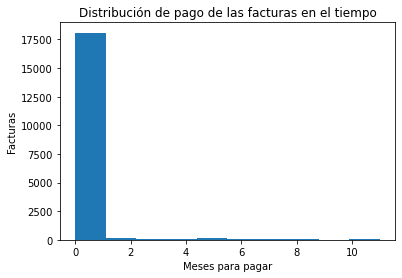

,Factura
MonthsLate,
0,16246
1,1846
2,145
3,61
4,77
5,117
6,70
7,41
8,70


In [19]:
fig=plt.figure()
ax = fig.add_subplot()
ax.hist(df_copy['MonthsLate'])
plt.title('Distribución de pago de las facturas en el tiempo')
plt.xlabel('Meses para pagar')
plt.ylabel('Facturas')
plt.show()
df_copy[['Factura', 'MonthsLate']].groupby("MonthsLate").count()

In [20]:
def calc_delta(row):
    days = (row['FechaPago'] - row['FechaVencimiento']).days
    return days if days > 0 else 0

df_copy['DaysLate'] = df_copy.apply(calc_delta, axis=1)
df_copy.head()

,Fecha,RFCCliente,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,Monto,DepositoInicial,Intereses,FechaPago,Status,MonthsLate,DaysLate
0,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,776,ACF2022006-7,USD,2022-07-01,64180.48,57762.43,287.21,2022-06-23,Liquidado,0,0
1,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,775,ACF2022006-7,USD,2022-07-01,68764.80,61888.32,307.72,2022-06-23,Liquidado,0,0
2,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,774,ACF2022006-7,USD,2022-07-01,68764.80,61888.32,307.72,2022-06-23,Liquidado,0,0
3,2022-06-15,GCL1212214H3,GRUPOCONSTRUCTORLERAVISADECV,MCO140523PL2,METALURGICADECOBRESADECV,LER222,ACF2021019-15,MXN,2022-07-15,414802.60,352582.21,9678.73,2022-06-24,Liquidado,0,0
4,2022-06-13,SAGF4002063X7,FRANCISCOSANCHEZGOMEZ,MTK861014317,"MAQUILASTETAKAWI,S.A.DEC.V.",CFDI3566,ACF2021024-36,MXN,2022-08-26,9048.00,7690.80,557.96,2022-06-24,Liquidado,0,0


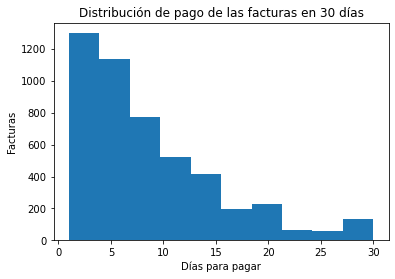

,Factura
DaysLate,
1,402
2,269
3,629
4,389
5,425
6,327
7,553
8,128
9,94


In [21]:
fig=plt.figure()
ax = fig.add_subplot()

# For a better visualization show only invoice with less than 30 days late
df_filtered = df_copy[(df_copy.DaysLate <= 30) & (df_copy.DaysLate > 0)]

ax.hist(df_filtered['DaysLate'])
plt.title('Distribución de pago de las facturas en 30 días')
plt.xlabel('Días para pagar')
plt.ylabel('Facturas')
plt.show()
df_filtered[['Factura', 'DaysLate']].groupby("DaysLate").count()

# TODO
#2- Generar modelo multiclase


In [22]:
def calc_delta(row):    
    weeks = (row['FechaPago'] - row['FechaVencimiento']) / np.timedelta64(1, 'W')
    return weeks if weeks > 0 else 0

df_copy['WeeksLate'] = df_copy.apply(calc_delta, axis=1)
df_copy = df_copy.astype({'WeeksLate':'int'})
df_copy.head()

,Fecha,RFCCliente,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,Monto,DepositoInicial,Intereses,FechaPago,Status,MonthsLate,DaysLate,WeeksLate
0,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,776,ACF2022006-7,USD,2022-07-01,64180.48,57762.43,287.21,2022-06-23,Liquidado,0,0,0
1,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,775,ACF2022006-7,USD,2022-07-01,68764.80,61888.32,307.72,2022-06-23,Liquidado,0,0,0
2,2022-06-22,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,774,ACF2022006-7,USD,2022-07-01,68764.80,61888.32,307.72,2022-06-23,Liquidado,0,0,0
3,2022-06-15,GCL1212214H3,GRUPOCONSTRUCTORLERAVISADECV,MCO140523PL2,METALURGICADECOBRESADECV,LER222,ACF2021019-15,MXN,2022-07-15,414802.60,352582.21,9678.73,2022-06-24,Liquidado,0,0,0
4,2022-06-13,SAGF4002063X7,FRANCISCOSANCHEZGOMEZ,MTK861014317,"MAQUILASTETAKAWI,S.A.DEC.V.",CFDI3566,ACF2021024-36,MXN,2022-08-26,9048.00,7690.80,557.96,2022-06-24,Liquidado,0,0,0


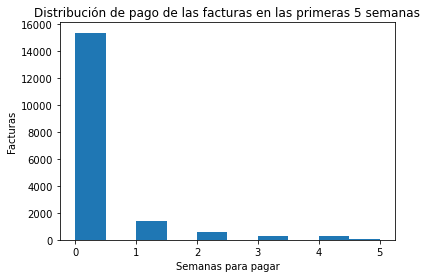

count    18709.000000
mean         0.958469
std          4.112427
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         46.000000
Name: WeeksLate, dtype: float64

In [23]:
fig=plt.figure()
ax = fig.add_subplot()

# For a better visualization show only invoices with less than 5 weeks late
df_filtered = df_copy[df_copy['WeeksLate'] <= 5]

ax.hist(df_filtered['WeeksLate'])
plt.title('Distribución de pago de las facturas en las primeras 5 semanas')
plt.xlabel('Semanas para pagar')
plt.ylabel('Facturas')
plt.show()
df_copy[['Factura', 'WeeksLate']].groupby("WeeksLate").count()
df_copy['WeeksLate'].describe()

# 3. Clean dataset

## 3.1 Remove duplicates

In [24]:
# df.duplicated()
df.sort_values("Factura", inplace = True)

unique_columns = ['Factura', 'Folio']
duplicates = df.duplicated(subset=unique_columns)
print('Duplicates:', duplicates.sum())

# Extract duplicated rows
df.loc[duplicates, :]


Duplicates: 1


,Fecha,RFCCliente,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,Monto,DepositoInicial,Intereses,FechaPago,Status
11156,2020-04-21,IKM840514TR3,"INDUSTRIASKUZZYDEMEXICO,S.A.DEC.V.",GTR0005086XA,GCCTransporteS.AdeC.V,C16993,ACF2019003-48,MXN,2020-06-04,9686.0,8233.1,280.23,2020-05-13,Liquidado


In [25]:
df.drop_duplicates(subset=unique_columns, inplace=True)
df.Factura.describe()

count     18708
unique    18046
top        1564
freq          4
Name: Factura, dtype: object

## 3.2 Remove irrelevant columns

In [26]:
# Remove Status columns because has only one value
df.drop("Status", axis=1, inplace=True)
# Remove folio and invoice because they do not contribute to the model
df.drop("Factura", axis=1, inplace=True)
df.drop("Folio", axis=1, inplace=True)

df.drop("Cliente", axis=1, inplace=True)
df.drop("Pagador", axis=1, inplace=True)

# 4.  Data Engineering

## 4.1 Invoice on time

On time: 69.12550780414796 %, Late: 30.874492195852042 %
Total on time: 12932
Total lates: 5776


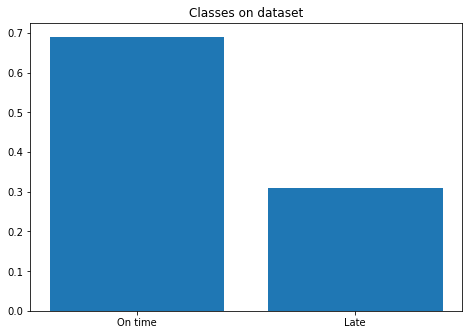

In [27]:
df_ontime_invoices = df[df.FechaPago <= df.FechaVencimiento]
df_late_invoices = df[df.FechaPago > df.FechaVencimiento]

OnTime = len(df_ontime_invoices.index) / len(df.index)
Late = len(df_late_invoices.index) / len(df.index)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['On time', 'Late'], [OnTime, Late])
plt.title('Classes on dataset')

print("On time:", OnTime*100,"%, Late:", Late*100, "%")
print('Total on time:', len(df_ontime_invoices.index))
print('Total lates:', len(df_late_invoices.index))


## 4.2 Map Moneda attribute

In [28]:
currency_map = {'MXN': 0, 'USD': 1}
df.Moneda = df.Moneda.map(currency_map)
df.head()

,Fecha,RFCCliente,RFCPagador,Moneda,FechaVencimiento,Monto,DepositoInicial,Intereses,FechaPago
7307,2021-04-02,DDI140206JB6,ASA141101JC7,1,2021-05-07,38879.48,33047.56,2351.94,2021-04-23
10725,2020-06-22,GOSJ630117VA4,BMM080124RT5,0,2020-07-12,6658.40,5659.64,109.45,2020-06-26
1797,2020-05-02,ECM190924RS5,GAI020902FG4,1,2020-03-31,791.12,791.12,29.26,2020-03-31
2128,2022-04-01,DIM9811232SA,MMJ930128UR6,0,2022-02-03,33048.00,28090.80,814.88,2022-02-04
2820,2021-10-11,SNO200526BV7,FMO8304236C5,0,2021-12-10,424634.82,360939.60,10615.87,2021-12-06


## 4.3 Map RFCCliente and RFCPagador attributes

In [29]:
# unique_rfc_cliente = df['RFCCliente'].unique()
# RFCCliente_map = {u: i for i, u in enumerate(unique_rfc_cliente)}
# df.RFCCliente = df.RFCCliente.map(RFCCliente_map)

unique_rfc_pagador = df['RFCPagador'].unique()
RFCPagador_map = {u: i for i, u in enumerate(unique_rfc_pagador)}
df.RFCPagador = df.RFCPagador.map(RFCPagador_map)

df.head()

,Fecha,RFCCliente,RFCPagador,Moneda,FechaVencimiento,Monto,DepositoInicial,Intereses,FechaPago
7307,2021-04-02,DDI140206JB6,0,1,2021-05-07,38879.48,33047.56,2351.94,2021-04-23
10725,2020-06-22,GOSJ630117VA4,1,0,2020-07-12,6658.40,5659.64,109.45,2020-06-26
1797,2020-05-02,ECM190924RS5,2,1,2020-03-31,791.12,791.12,29.26,2020-03-31
2128,2022-04-01,DIM9811232SA,3,0,2022-02-03,33048.00,28090.80,814.88,2022-02-04
2820,2021-10-11,SNO200526BV7,4,0,2021-12-10,424634.82,360939.60,10615.87,2021-12-06


## 4.4 Format dates
Replace all dates to the number of days passed since January 1st 2016.

In [30]:
def calc_timeDelta(df, col):
    return (df[col] - datetime(2016, 1, 1)) / np.timedelta64(1, 'D')

print('Min date:', df.Fecha.min())
print('Max date:', df.Fecha.max())

df["Fecha"] = calc_timeDelta(df, "Fecha")
df["FechaVencimiento"] = calc_timeDelta(df, "FechaVencimiento")
df["FechaPago"] = calc_timeDelta(df, "FechaPago")
df.head()

Min date: 2016-01-11 00:00:00
Max date: 2022-12-05 00:00:00


,Fecha,RFCCliente,RFCPagador,Moneda,FechaVencimiento,Monto,DepositoInicial,Intereses,FechaPago
7307,1918.0,DDI140206JB6,0,1,1953.0,38879.48,33047.56,2351.94,1939.0
10725,1634.0,GOSJ630117VA4,1,0,1654.0,6658.40,5659.64,109.45,1638.0
1797,1583.0,ECM190924RS5,2,1,1551.0,791.12,791.12,29.26,1551.0
2128,2282.0,DIM9811232SA,3,0,2225.0,33048.00,28090.80,814.88,2226.0
2820,2110.0,SNO200526BV7,4,0,2170.0,424634.82,360939.60,10615.87,2166.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18708 entries, 7307 to 9518
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             18708 non-null  float64
 1   RFCCliente        18708 non-null  object 
 2   RFCPagador        18708 non-null  int64  
 3   Moneda            18708 non-null  int64  
 4   FechaVencimiento  18708 non-null  float64
 5   Monto             18708 non-null  float64
 6   DepositoInicial   18708 non-null  float64
 7   Intereses         18708 non-null  float64
 8   FechaPago         18708 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.4+ MB


<AxesSubplot:>

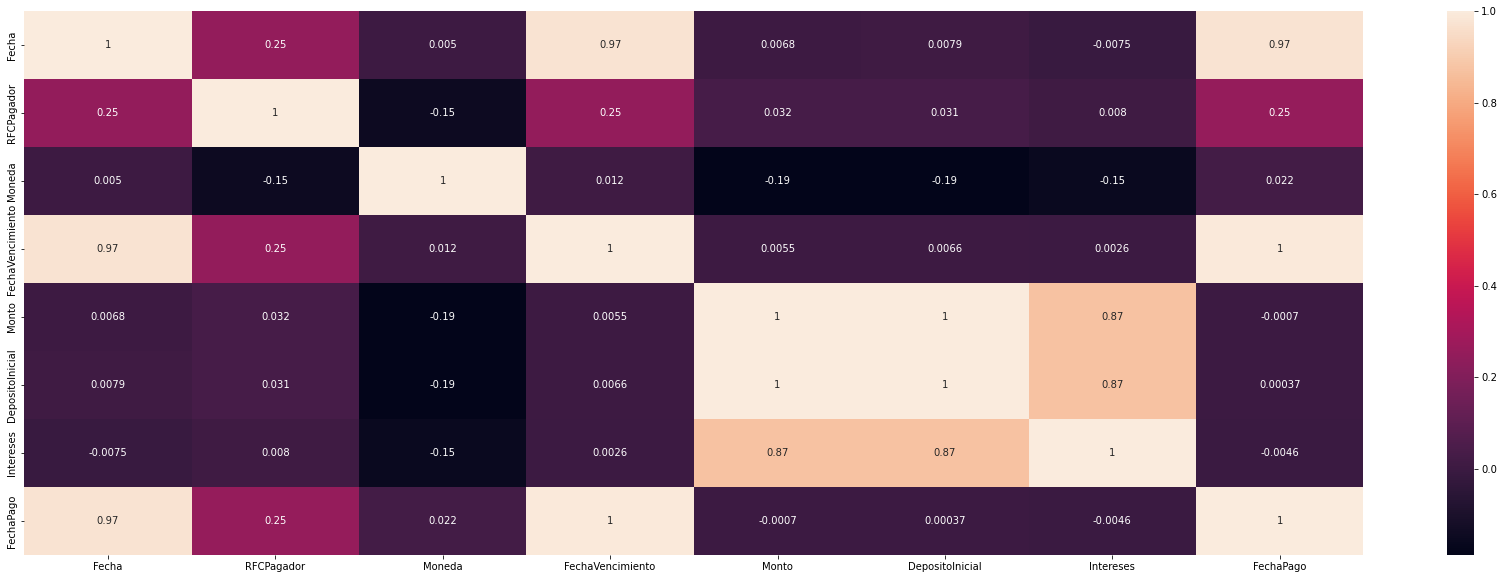

In [32]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")

In [33]:
# Save dataset into S3 bucket
s3_res = boto3.Session().resource('s3')
csv_buffer = StringIO()

df.to_csv(csv_buffer, index=False)

s3_res.Object(bucket_name, 'data/all.csv').put(Body=csv_buffer.getvalue())

print("Dataframe is saved as CSV in S3 bucket.")

Dataframe is saved as CSV in S3 bucket.
